In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df= pd.read_csv("E:\\download folder\\delivery_time.csv")
df.shape

(21, 2)

In [36]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [79]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: ylabel='Delivery Time'>

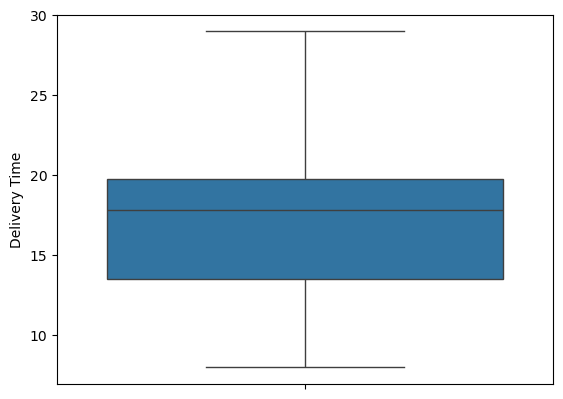

In [6]:
sns.boxplot(df["Delivery Time"])

<Axes: ylabel='Sorting Time'>

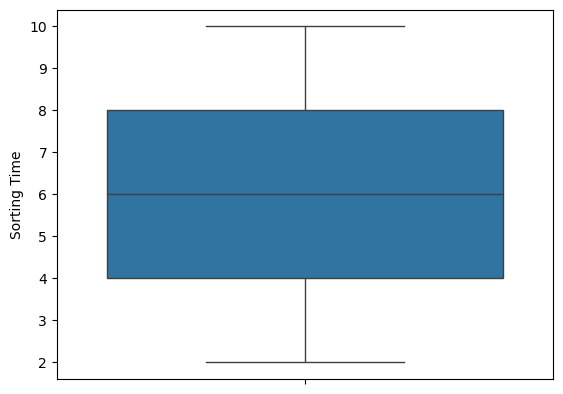

In [39]:
sns.boxplot(df["Sorting Time"])

Text(0.5, 1.0, 'Sorting Time')

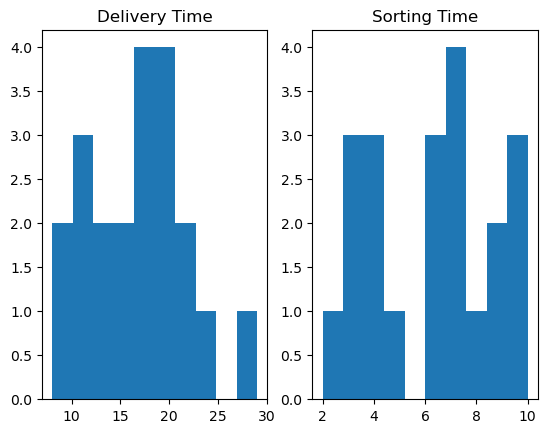

In [40]:
plt.subplot(1,2,1)
plt.hist(df["Delivery Time"])
plt.title("Delivery Time")
plt.subplot(1,2,2)
plt.hist(df["Sorting Time"])
plt.title("Sorting Time")

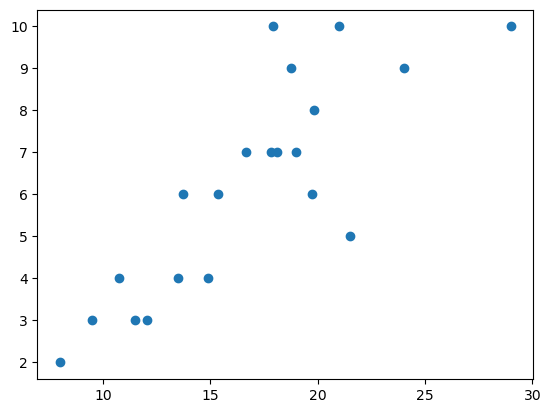

In [41]:
plt.scatter(df["Delivery Time"],df["Sorting Time"])

In [49]:
x= df.iloc[:,1]
y= df.iloc[:,0]
x= np.array(x)
x= x.reshape(-1, 1)

In [50]:
#Data partition

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30)

In [66]:
#Model fitting

from sklearn.linear_model import LinearRegression

LR= LinearRegression()
LR.fit(x_train, y_train)
y_pred_train= LR.predict(x_train)
y_pred_test= LR.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

training_error= mean_squared_error(y_train, y_pred_train)
testing_error= mean_squared_error(y_test, y_pred_test)

training_score= r2_score(y_train, y_pred_train)
testing_score= r2_score(y_test, y_pred_test)

print("Root mean squared error of training: ", np.sqrt(training_error).round(2))
print("Root mean squared error of testing: ", np.sqrt(testing_error).round(2))

print("R square of training: ",(training_score).round(2))
print("R square of testing: ",(testing_score).round(2))

Root mean squared error of training:  3.16
Root mean squared error of testing:  2.01
R square of training:  0.57
R square of testing:  0.8


In [77]:
# Cross validation

training_error= []
testing_error=[]

training_score=[]
testing_score=[]

for i in range(1,201):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=i)
    LR.fit(x_train, y_train)
    y_pred_train= LR.predict(x_train)
    y_pred_test= LR.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_pred_train))
    testing_error.append(mean_squared_error(y_test, y_pred_test))
    training_score.append(r2_score(y_train, y_pred_train))
    testing_score.append(r2_score(y_test, y_pred_test))
print("Root mean squared error of training: ", np.mean(np.sqrt(training_error)).round(2))
print("Root mean squared error of testing: ", np.mean(np.sqrt(testing_error)).round(2))

print("R square of training: ",np.mean((training_score)).round(2))
print("R square of testing: ", np.mean((testing_score)).round(2))

Root mean squared error of training:  2.7
Root mean squared error of testing:  3.06
R square of training:  0.67
R square of testing:  0.48
